# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd

In [51]:
df = pd.read_csv("/Users/Yu/Documents/GitHub/ml-project-unsupervised-learning/Wholesale_Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [4]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

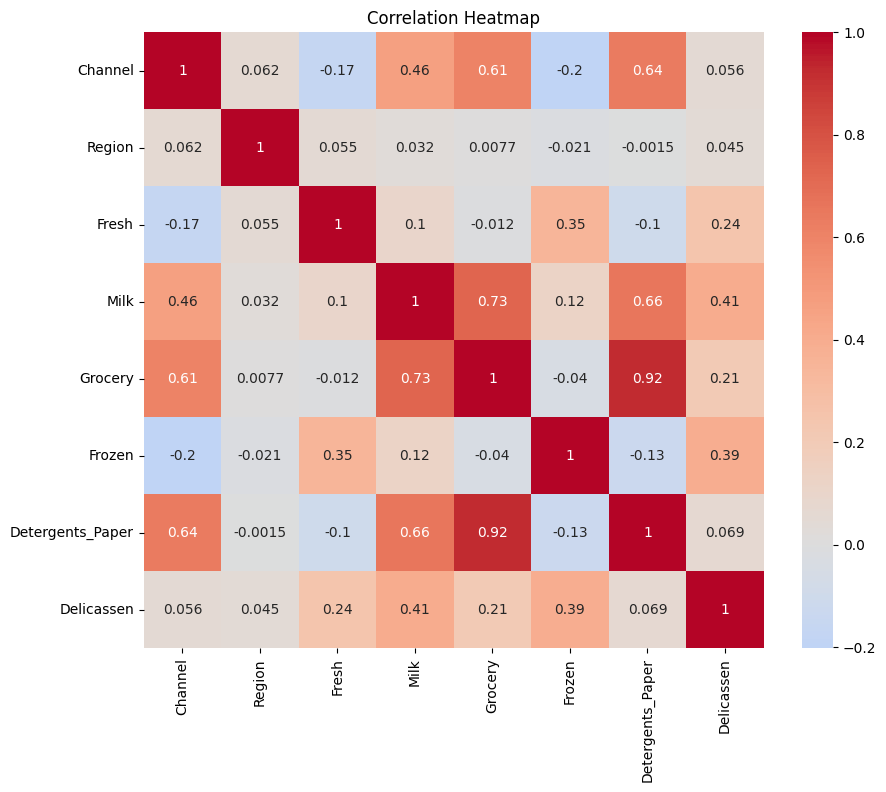

In [10]:
# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

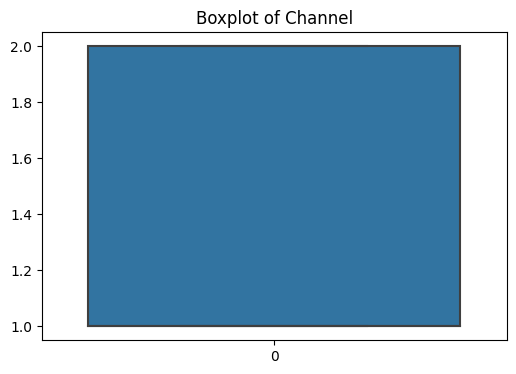

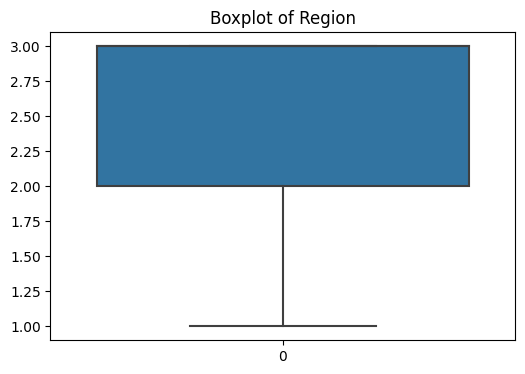

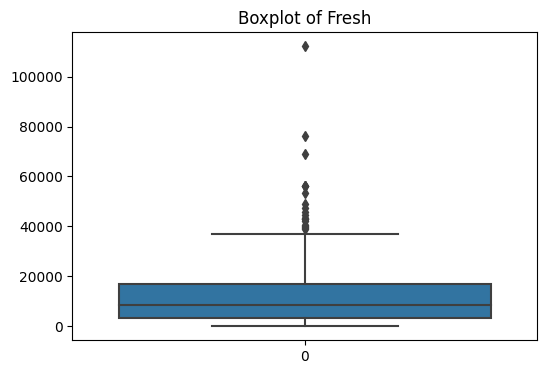

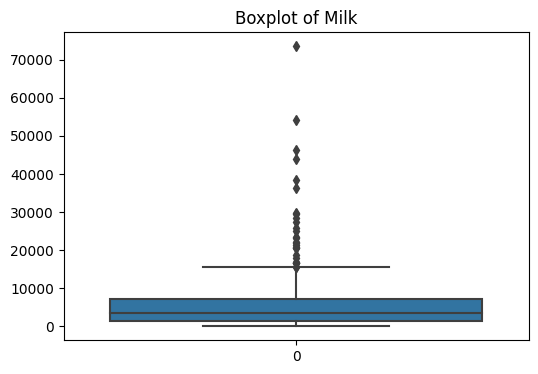

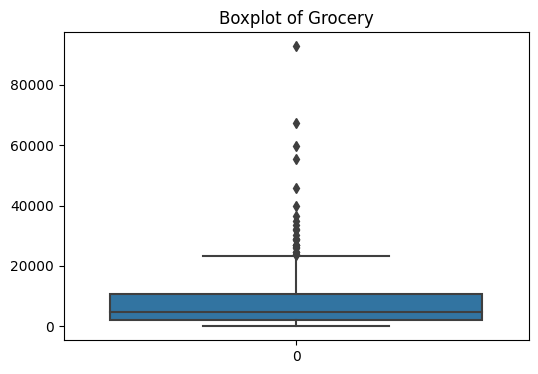

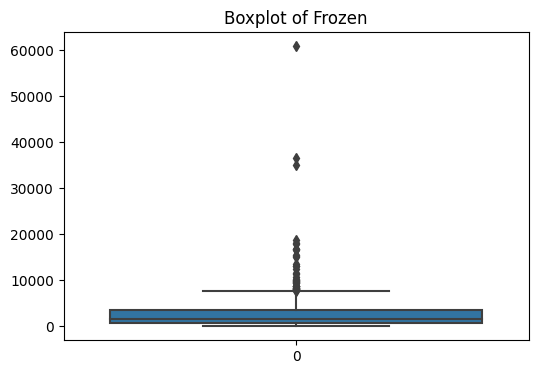

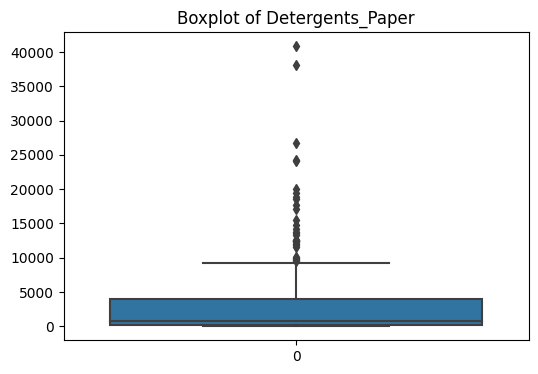

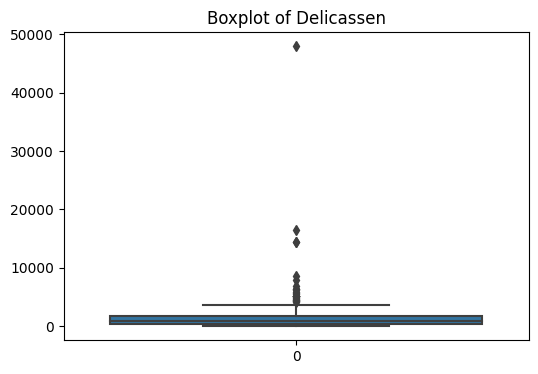

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27


In [9]:
# Draw boxplots for all features
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in df.columns:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

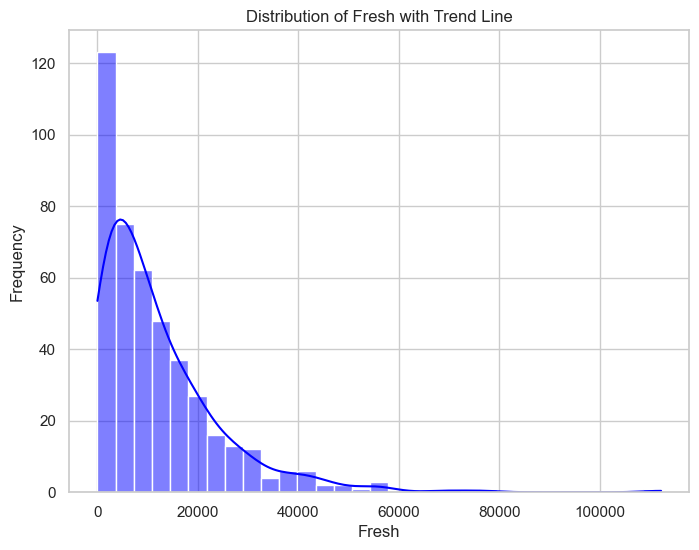

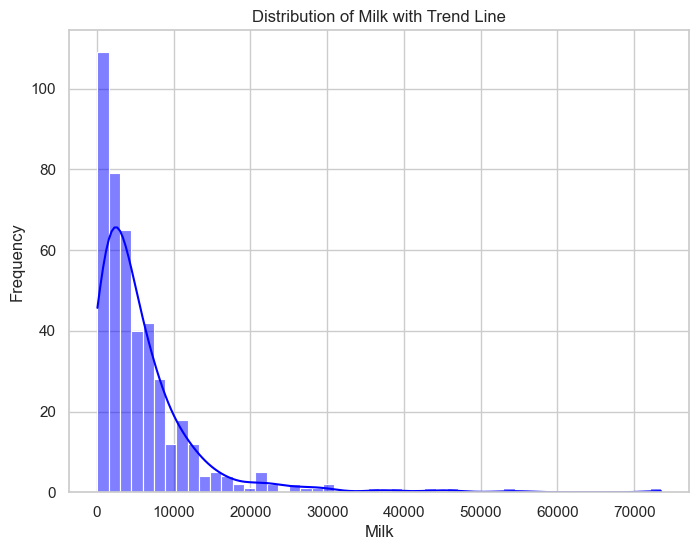

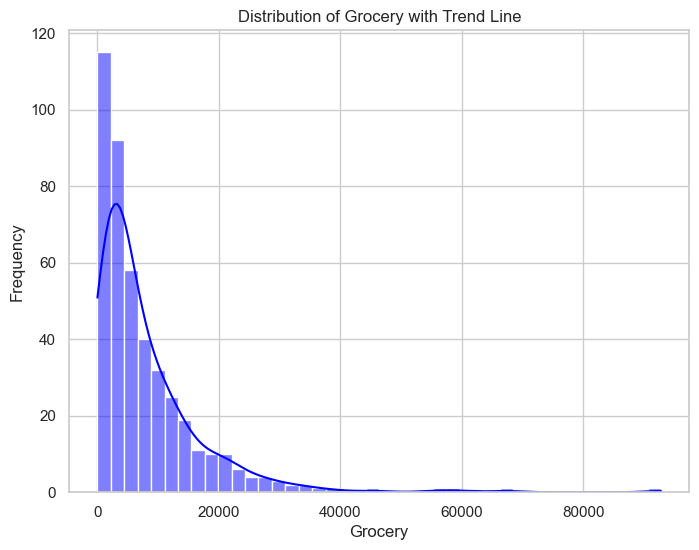

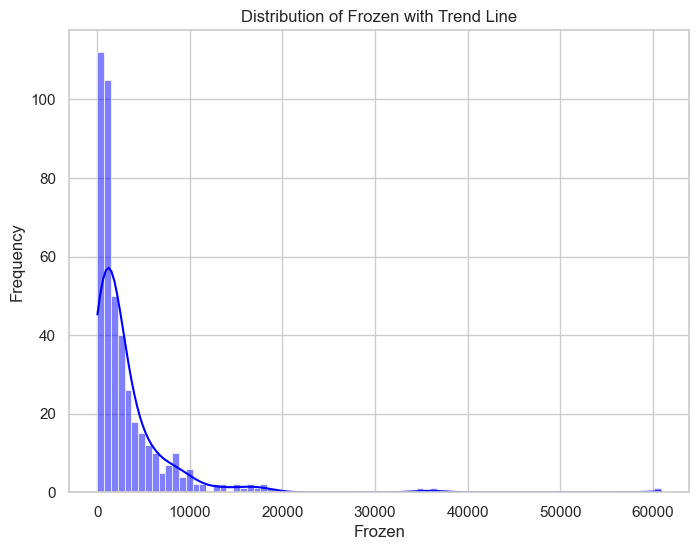

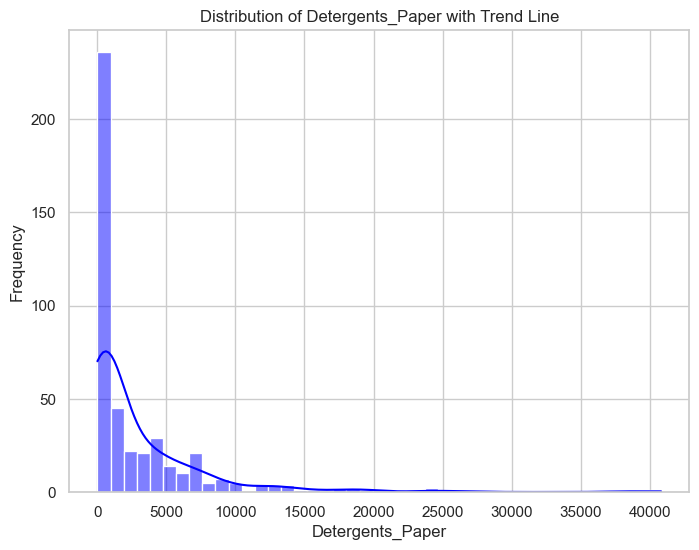

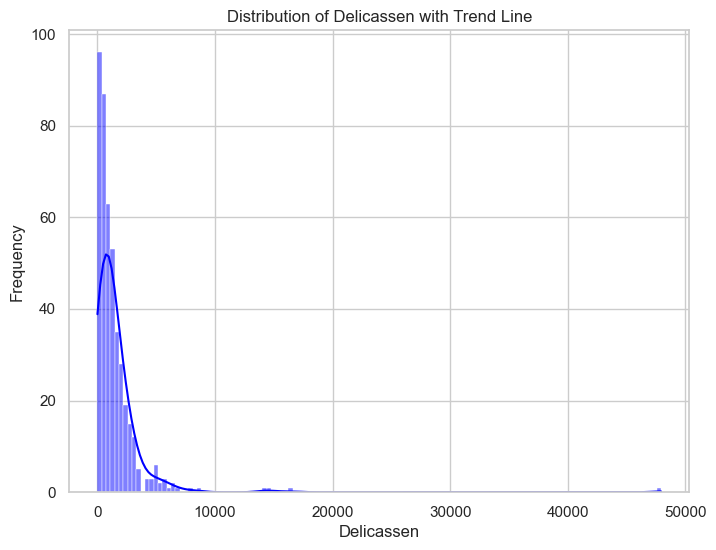

In [12]:
sns.set(style="whitegrid")

# Plot histograms for the features
features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True, color='blue')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} with Trend Line')
    plt.show()

In [52]:
import numpy as np

# Using a log-transform to handle long-tailed distributions
# Apply log-transform to the features
for feature in features:
    df[feature] = np.log1p(df[feature])
    

# Handle outliers by capping values above a threshold
outlier_threshold = np.percentile(df[features], 95) 
df[feature] = df[feature].apply(lambda x: min(x, outlier_threshold))

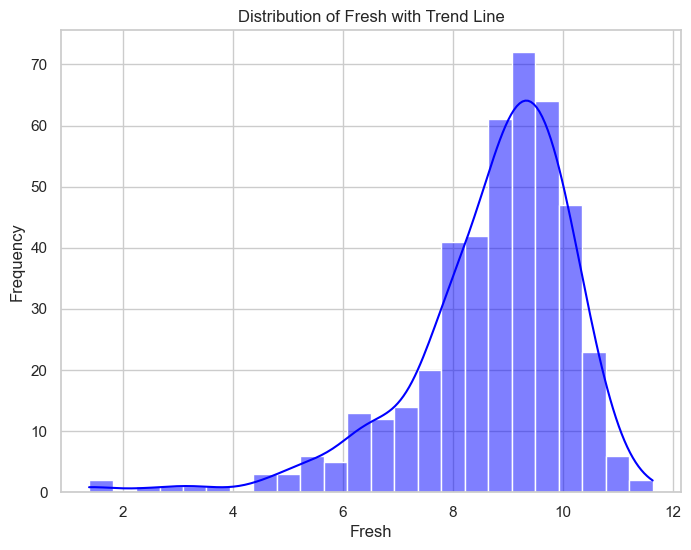

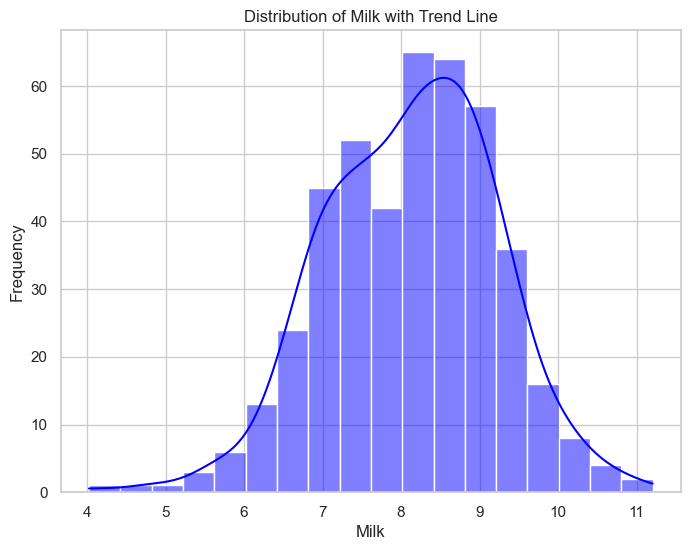

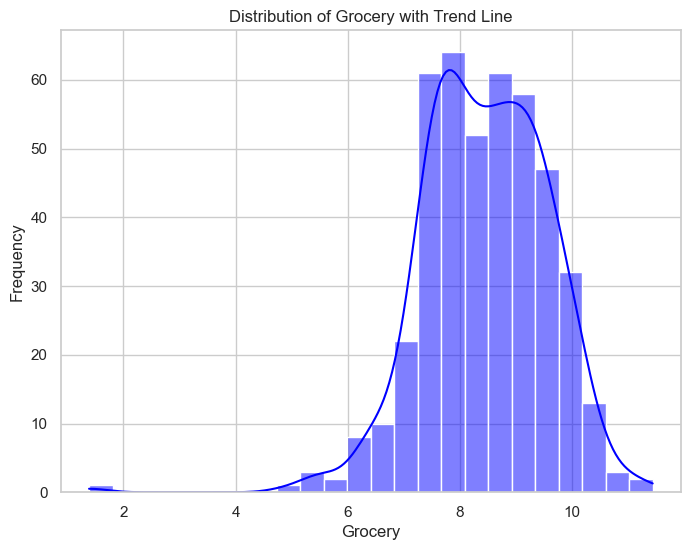

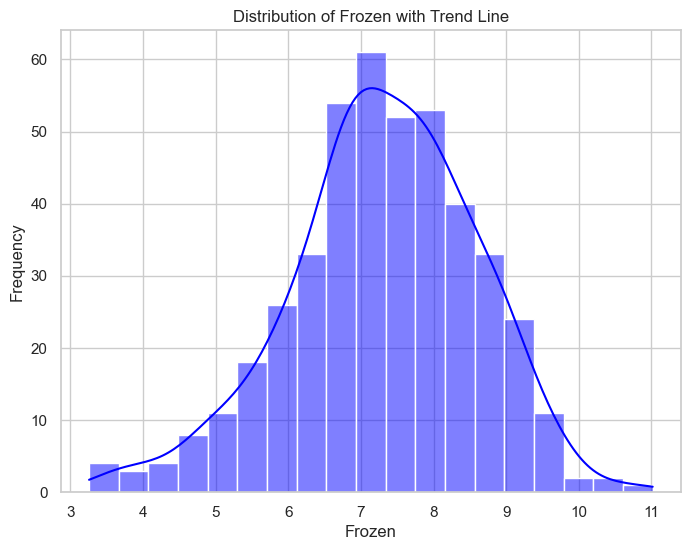

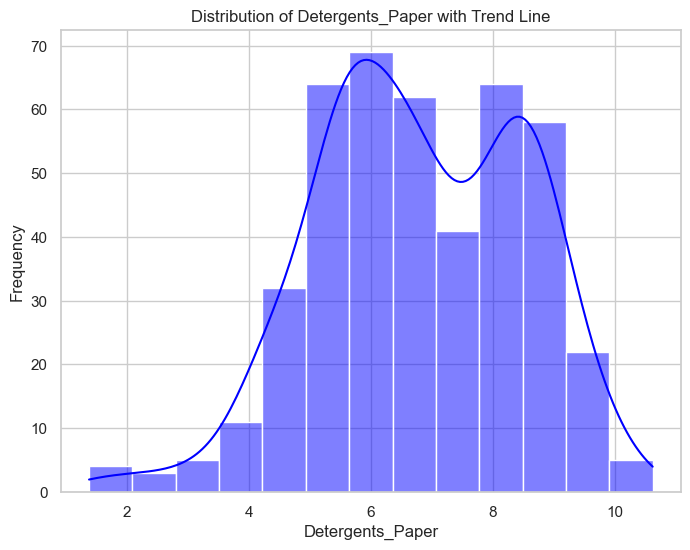

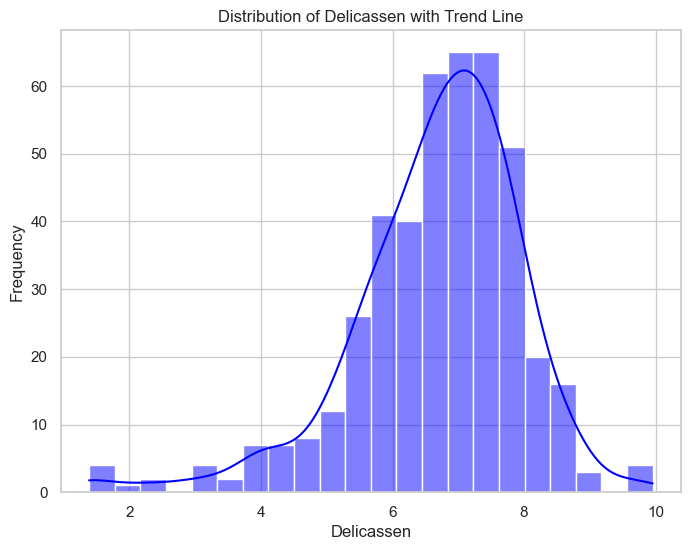

In [14]:
# Plot histograms for the features after handling the outliers

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True, color='blue')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} with Trend Line')
    plt.show()

In [53]:
# Channel and Region are more like categorical variables and this will affect KMeans Clustering result. 
# Using one-hot encoding to convert categorical features to numerics.

df_encoded = pd.get_dummies(df, columns=["Channel", "Region"], dtype=int)
df_encoded

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,0,1,0,0,1
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,0,1,0,0,1
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,0,1,0,0,1
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1,0,0,0,1
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,10.299037,9.396986,9.682092,9.483112,5.209486,7.698483,1,0,0,0,1
436,10.577172,7.266827,6.639876,8.414274,4.543295,7.760893,1,0,0,0,1
437,9.584108,9.647885,10.317053,6.082219,9.605216,7.532624,0,1,0,0,1
438,9.239025,7.591862,7.711101,6.946014,5.129899,7.661998,1,0,0,0,1


In [54]:
df = df_encoded

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

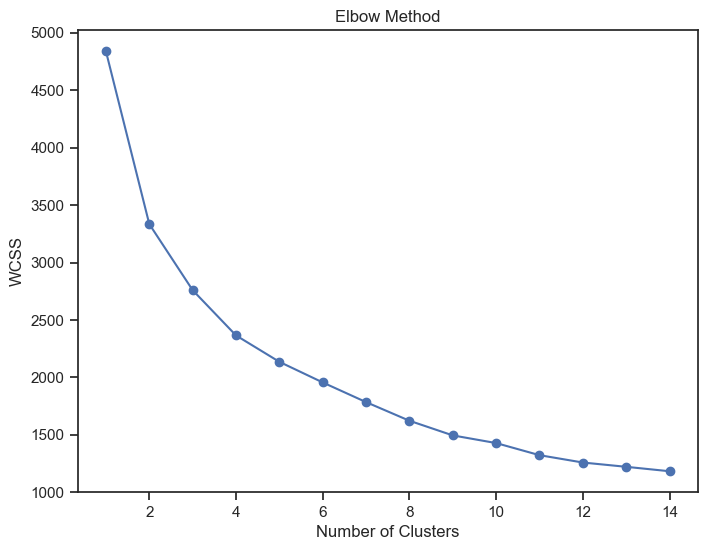

In [56]:
from sklearn.cluster import KMeans
# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
from sklearn.metrics import silhouette_score
# Range of optimal clusters to evaluate
optimal_clusters_range = [2, 3, 4, 5, 6]

# Evaluate clustering performance for each number of clusters
for optimal_clusters in optimal_clusters_range:
    print(f"Optimal Clusters: {optimal_clusters}")
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    centroids = kmeans.cluster_centers_
    
    # Calculate silhouette score (a measure of cluster quality)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg}")

Optimal Clusters: 2
Silhouette Score: 0.32799662509284594
Optimal Clusters: 3
Silhouette Score: 0.32308595934225315
Optimal Clusters: 4
Silhouette Score: 0.35695692048072386
Optimal Clusters: 5
Silhouette Score: 0.256364839937373
Optimal Clusters: 6
Silhouette Score: 0.275132111024481


In [58]:
# KMeans clustering using k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)
centroids = kmeans.cluster_centers_

df['Cluster'] = cluster_labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,Cluster
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,0,1,0,0,1,0
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,0,1,0,0,1,0
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,0,1,0,0,1,0
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1,0,0,0,1,2
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,0,1,0,0,1,0


In [59]:
# Check the size of each cluster
print("Cluster Sizes:\n", df['Cluster'].value_counts())

Cluster Sizes:
 Cluster
2    211
0    121
1     61
3     47
Name: count, dtype: int64


In [60]:
# Calculate cluster statistics
cluster_means = df.groupby('Cluster').mean()
cluster_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
Cluster,,,,,,,,,,,
0,8.378420,9.066079,9.531133,6.813133,8.608690,6.951392,0.000000,1.000000,0.132231,0.0,0.867769
1,8.989209,7.773977,7.982739,7.615842,6.088176,6.590303,0.967213,0.032787,1.000000,0.0,0.000000
2,8.903197,7.707507,7.892452,7.464463,5.917405,6.534624,1.000000,0.000000,0.000000,0.0,1.000000
3,8.547504,8.000397,8.703162,7.434449,6.952788,6.649480,0.595745,0.404255,0.000000,1.0,0.000000


<Figure size 1000x1000 with 0 Axes>

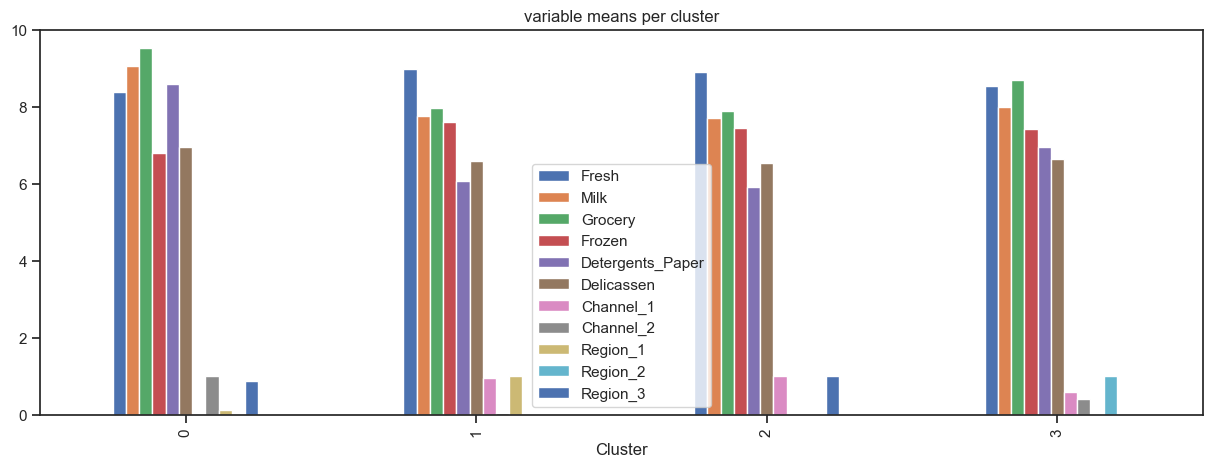

In [61]:
plt.figure(figsize=(10,10))
cluster_means.groupby('Cluster').mean().plot(kind='bar', figsize=(15,5))
plt.title('variable means per cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

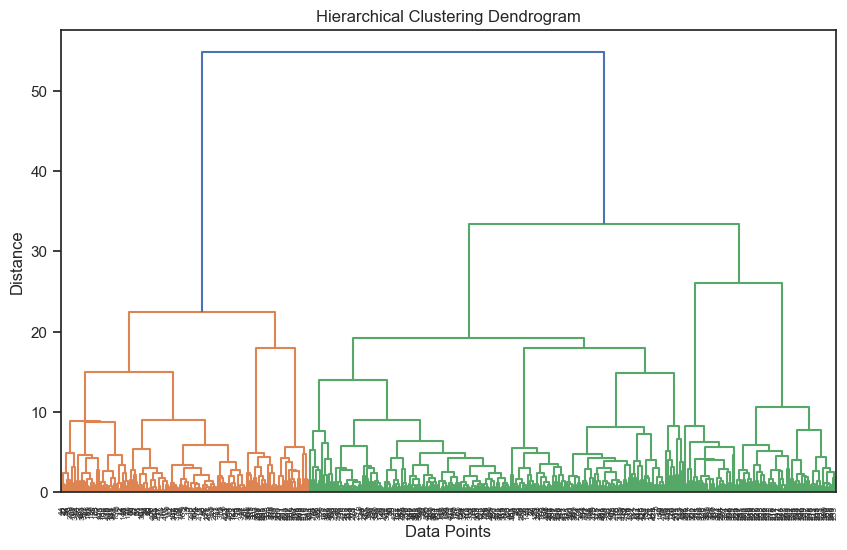

In [62]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate pairwise distances
distances = linkage(df_scaled, method='ward', metric='euclidean')

# Create dendrogram
plt.figure(figsize=(10, 6))
dendrogram(distances, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Number of Components: 7
Cumulative Variance Explained: 0.96


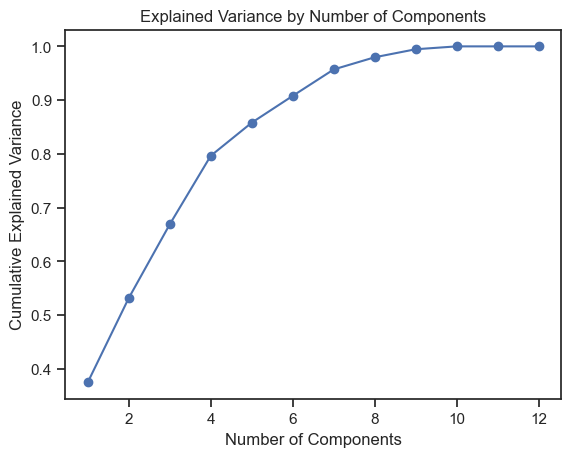

In [63]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Determine the optimal number of components that explain a desired amount of variance
desired_variance_explained = 0.95
num_components = (cumulative_variance <= desired_variance_explained).sum() + 1

# Fit PCA with the optimal number of components
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(df_scaled)

print(f"Number of Components: {num_components}")
print(f"Cumulative Variance Explained: {cumulative_variance[num_components-1]:.2f}")


import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()


/opt/anaconda3/envs/the_one/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


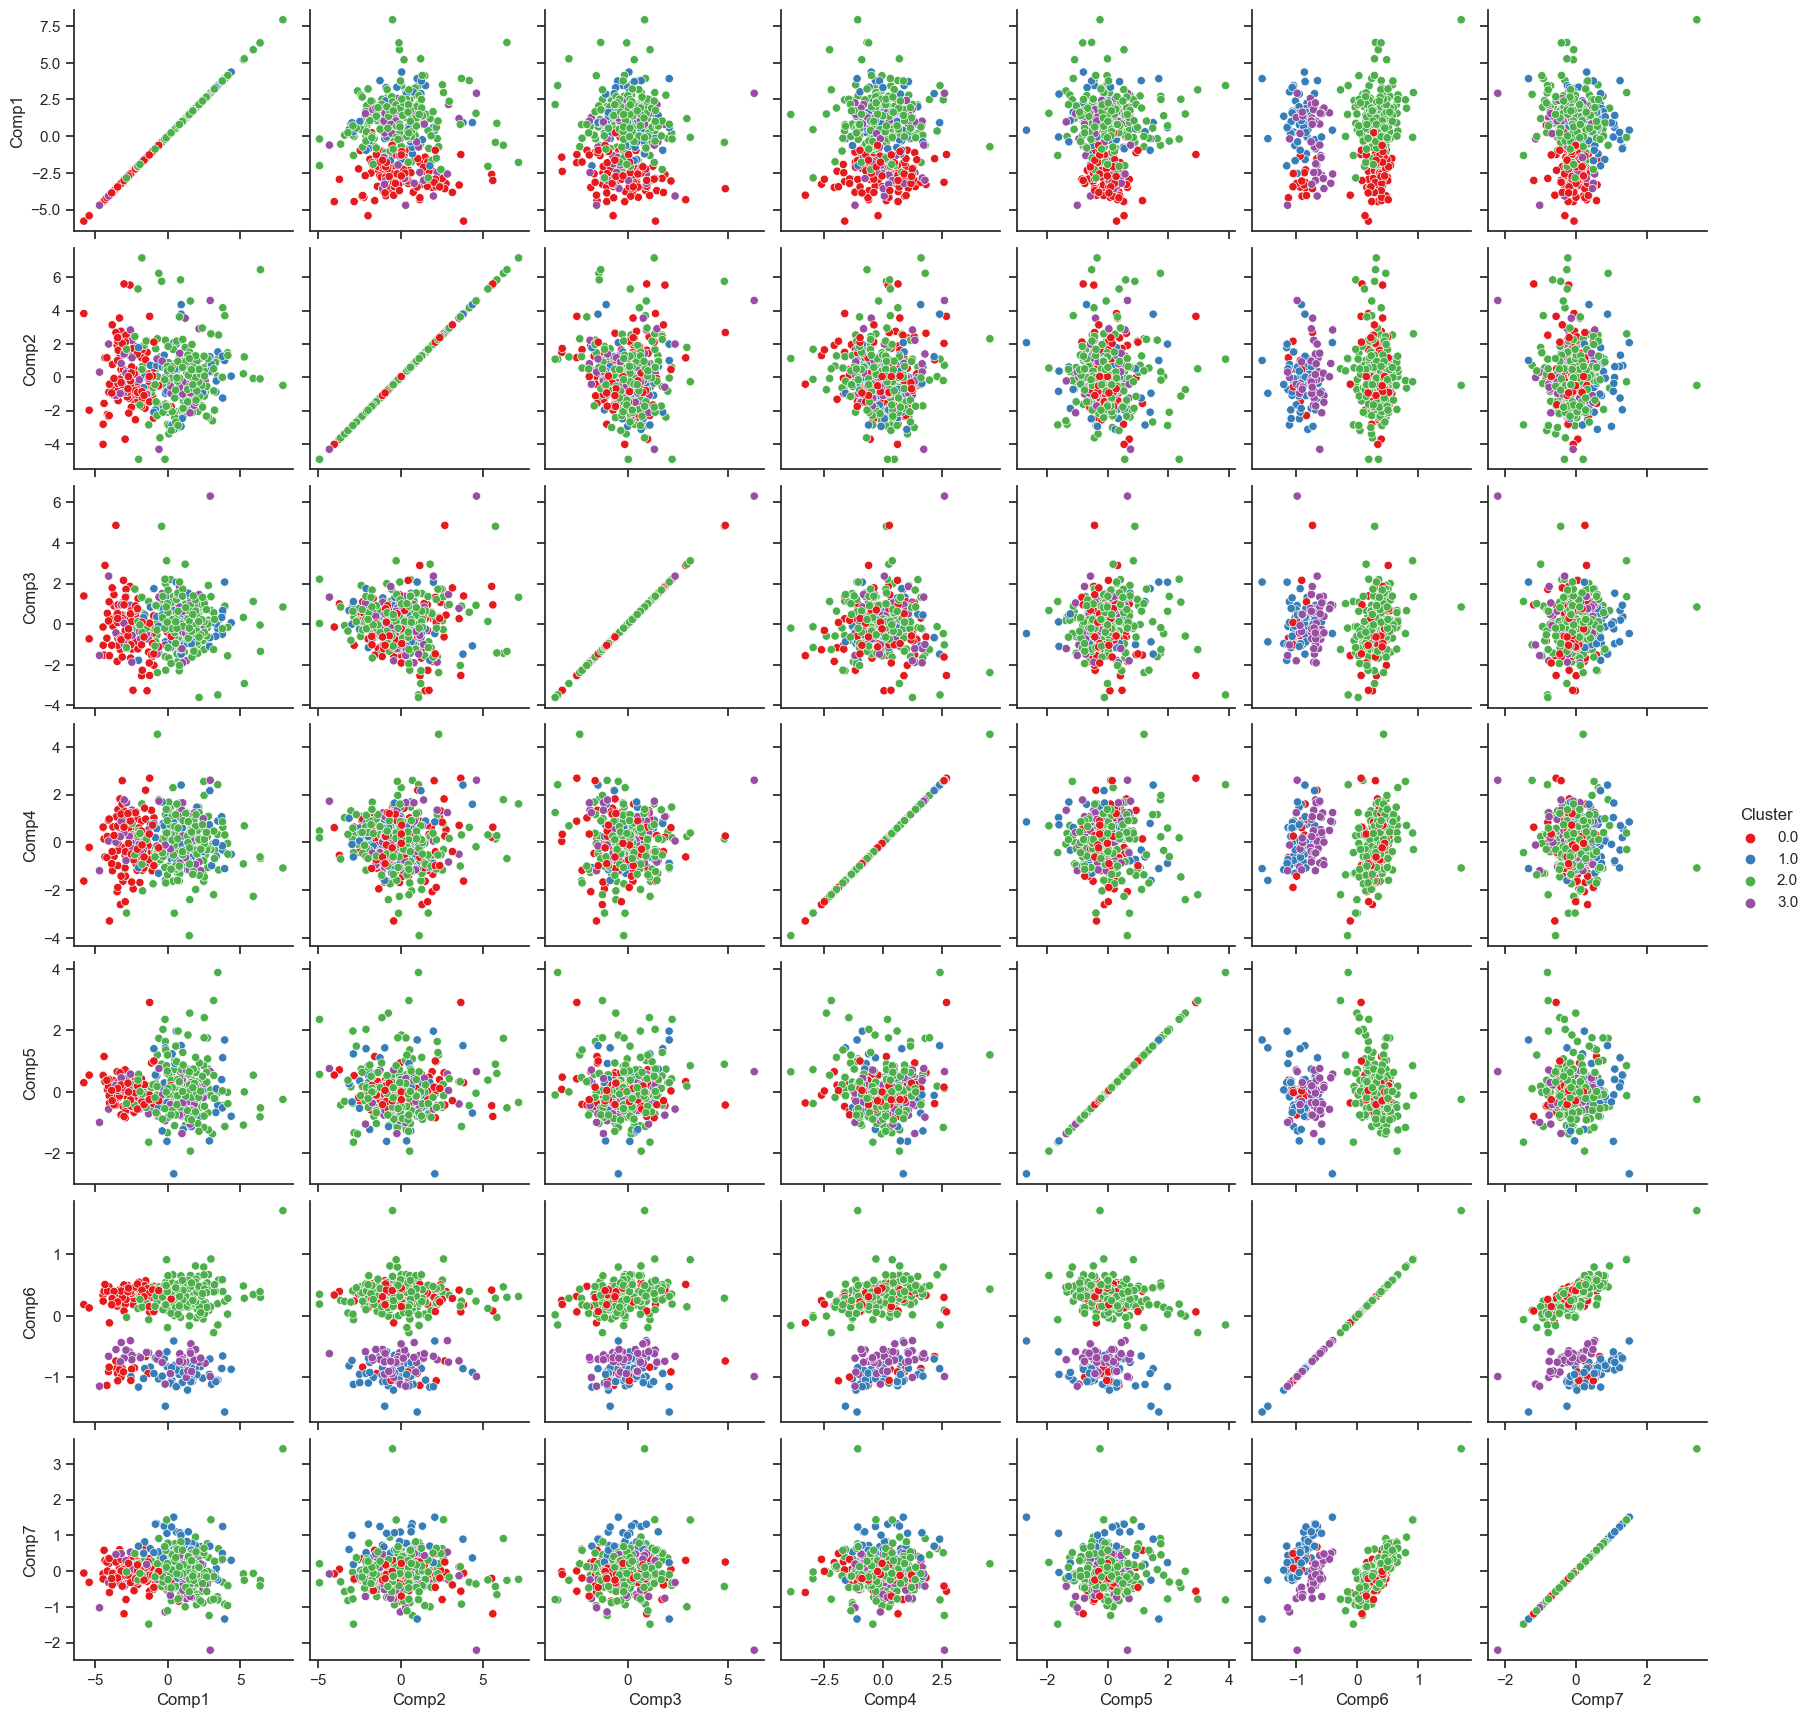

In [70]:
pca = PCA(n_components=7)
reduced=pca.fit_transform(df.iloc[:,:-1])

columns=['Comp1','Comp2','Comp3','Comp4', 'Comp5', 'Comp6', 'Comp7', 'Cluster']
reduced_df = pd.DataFrame(np.column_stack([reduced, df['Cluster']]), columns=columns)
sns.pairplot(reduced_df, hue='Cluster', diag_kind=None, vars=columns[0:-1], palette='Set1')
plt.show()

/opt/anaconda3/envs/the_one/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


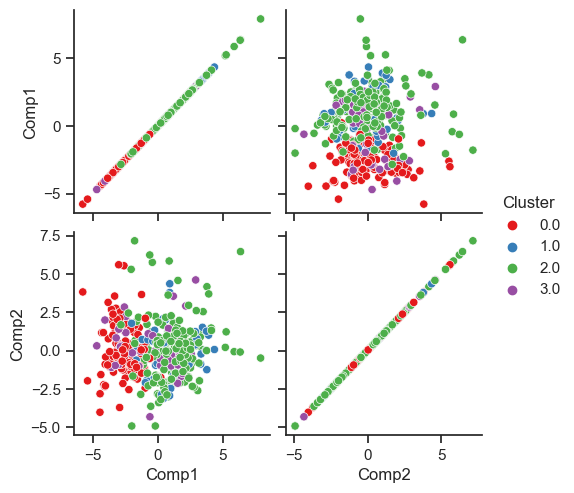

In [75]:
# what if we reduct the demention to 2 for the better of view?
pca = PCA(n_components=2)
reduced=pca.fit_transform(df.iloc[:,:-1])

columns=['Comp1','Comp2', 'Cluster']
reduced_df = pd.DataFrame(np.column_stack([reduced, df['Cluster']]), columns=columns)
sns.pairplot(reduced_df, hue='Cluster', diag_kind=None, vars=columns[0:-1], palette='Set1')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. No missing values. 
2. No duplicates.
3. Channels and Regions are categorical variables.
4. The means and standard deviations for each feature vary significantly. It means the range of values for each feature has a huge difference. Need to do feature scaling.
5. There are outliers for some of the features.
6. The elbow method can determine the optimal value of the number of clusters k. Selecting too many clusters may lead to WCSS(Within-Cluster Sums of Squares) of 0 while too few may result in high WCSS. From the elbow plot, we can the the optimal number of cluster maybe 4, 5 or 6. To determine which number is the appropriate bumber cluster, we can use Silhouette Score to valuate the cluster quality. we can see 4 has a higher values and staring from 4, the scores decreased. So 4 cluster is the ideal number in this case. Compared with the Hierarchical Clustering Dendrogram, elbow plot is more straitforward.
7. From Hierarchical Clustering Dendrogram, we can see how clusters are merging at different distances. From my understanding, the level of 4 is an approporiate distance. 
7. We can visualize the clusters via pairs of variables. In order to do that efficiently and make it iterprets the model better, we have to reduce the dimensionality. By using PCA, we find out the optimal number of components is 7. It can explain 96% of the total variance. From the visualization, it is still difficult to grap the clusters when there are 7 components. However, when reducing the number to 2, we barely get any information. It seems like choosing 7 components could provide better results.
